In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data[:,:2]
y = iris.target

In [ ]:
x,y

(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2],
        [4.6, 3.1],
        [5. , 3.6],
        [5.4, 3.9],
        [4.6, 3.4],
        [5. , 3.4],
        [4.4, 2.9],
        [4.9, 3.1],
        [5.4, 3.7],
        [4.8, 3.4],
        [4.8, 3. ],
        [4.3, 3. ],
        [5.8, 4. ],
        [5.7, 4.4],
        [5.4, 3.9],
        [5.1, 3.5],
        [5.7, 3.8],
        [5.1, 3.8],
        [5.4, 3.4],
        [5.1, 3.7],
        [4.6, 3.6],
        [5.1, 3.3],
        [4.8, 3.4],
        [5. , 3. ],
        [5. , 3.4],
        [5.2, 3.5],
        [5.2, 3.4],
        [4.7, 3.2],
        [4.8, 3.1],
        [5.4, 3.4],
        [5.2, 4.1],
        [5.5, 4.2],
        [4.9, 3.1],
        [5. , 3.2],
        [5.5, 3.5],
        [4.9, 3.6],
        [4.4, 3. ],
        [5.1, 3.4],
        [5. , 3.5],
        [4.5, 2.3],
        [4.4, 3.2],
        [5. , 3.5],
        [5.1, 3.8],
        [4.8, 3. ],
        [5.1, 3.8],
        [4.6, 3.2],
        [5.3, 3.7],
        [5. , 3.3],


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.30)

**SVC**

In [ ]:
from sklearn.svm import SVC 

In [ ]:
svc = SVC(kernel='linear').fit(X_train, Y_train)
rbf_svc = SVC(kernel='rbf', gamma=0.7).fit(X_train, Y_train)
poly_svc = SVC(kernel='poly', degree=3).fit(X_train, Y_train)

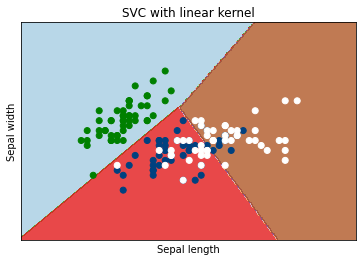

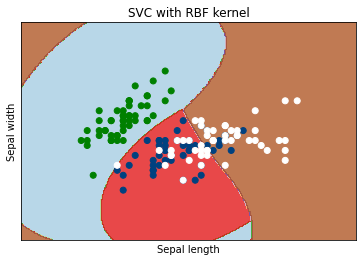

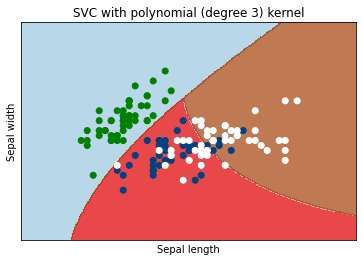

In [ ]:
import matplotlib.pyplot as plt
#Create a mesh to plot in
h = 0.02 # step size in the mesh
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

#Define title for the plots
titles = ['SVC with linear kernel',
'SVC with RBF kernel',
'SVC with polynomial (degree 3) kernel']
for i, clf in enumerate((svc, rbf_svc, poly_svc)):
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
  plt.figure(i)

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

  # Plot also the training points
  plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.ocean)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title(titles[i])

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
ypred1 = svc.predict(X_test)
ypred2 = rbf_svc.predict(X_test)
ypred3 = poly_svc.predict(X_test)

In [ ]:
print(f"Accuracy Score on SVC is : {accuracy_score(Y_test,ypred1)}")
print(f"Accuracy Score on Rbf SVC is : {accuracy_score(Y_test,ypred2)}")
print(f"Accuracy Score on Polynomial Svc is : {accuracy_score(Y_test,ypred3)}")

Accuracy Score on SVC is : 0.7555555555555555
Accuracy Score on Rbf SVC is : 0.7333333333333333
Accuracy Score on Polynomial Svc is : 0.7333333333333333


**Linear SVC**

In [ ]:
from sklearn.svm import LinearSVC
lin_svm = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
intercept_scaling=1, loss='squared_hinge', max_iter=1000,
multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
verbose=0)
lin_svm.fit(X_train, Y_train)
score = lin_svm.score(X_train, Y_train)
print("Score: ", score)

Score:  0.7904761904761904


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
def evaluate(model, x, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=1, error_score='raise')

In [ ]:
evaluate(lin_svm,x,y)

In [ ]:
ypred = lin_svm.predict(X_test)
from sklearn.metrics import classification_report
cr = classification_report(Y_test, ypred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.58      0.79      0.67        14
           2       0.77      0.56      0.65        18

    accuracy                           0.76        45
   macro avg       0.78      0.78      0.77        45
weighted avg       0.78      0.76      0.75        45



In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
# n_classes = 3
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
y = label_binarize(y, classes=[0,1,2])
n_classes = 3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=
0)
# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

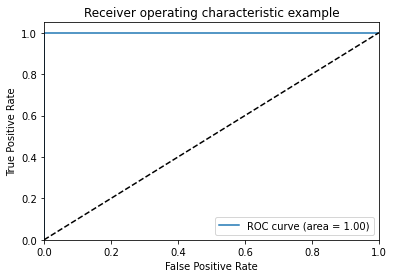

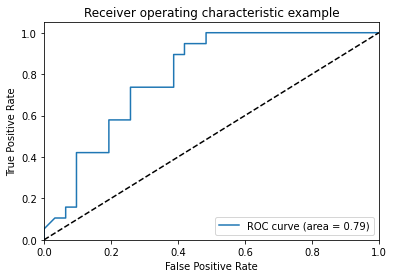

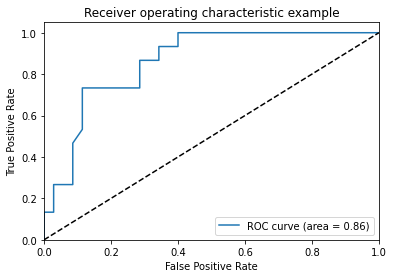

In [ ]:
for i in range(n_classes):
  plt.figure()
  plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example')
  plt.legend(loc="lower right")
  plt.show()

## Tuning

In [ ]:
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import io
import requests
url="https://www.openml.org/d/554"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))
# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [ ]:
from sklearn.svm import LinearSVC
from time import time
initial = time()
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_pred = lin_clf.predict(X_train)
print(f"Accuracy score is : {accuracy_score(y_train, y_pred)}")
print(f"Total Time Taken is {time()-initial}")

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Accuracy score is : 0.8348666666666666
Total Time Taken is 186.70008778572083


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
initial = time()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)
y_pred = lin_clf.predict(X_train_scaled)
print(f"Accuracy score is : {accuracy_score(y_train, y_pred)}")
print(f"Total Time Taken is {time()-initial}")

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Accuracy score is : 0.9214
Total Time Taken is 635.865504026413


In [ ]:
from sklearn.svm import SVC
initial = time()
svm_clf = SVC(kernel='rbf', gamma='scale')
svm_clf.fit(X_train_scaled[:10000], y_train[:10000]) # We use an SVC with an RBF kernel
y_pred = svm_clf.predict(X_train_scaled)
print(f"Accuracy score is : {accuracy_score(y_train, y_pred)}")
print(f"Total Time Taken is {time()-initial}")

Accuracy score is : 0.9455333333333333
Total Time Taken is 150.34844207763672


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])
#Adding all values of hyperparameters in a list from which the values of hyperparameter will randomly inserted as hyperparameter

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ......C=7.478461018761968, gamma=0.0876294662756979; total time=   0.3s
[CV] END ......C=7.478461018761968, gamma=0.0876294662756979; total time=   0.3s
[CV] END ......C=7.478461018761968, gamma=0.0876294662756979; total time=   0.3s
[CV] END ....C=4.077336422253358, gamma=0.014735758715080385; total time=   0.3s
[CV] END ....C=4.077336422253358, gamma=0.014735758715080385; total time=   0.3s
[CV] END ....C=4.077336422253358, gamma=0.014735758715080385; total time=   0.3s
[CV] END .......C=6.29356402619361, gamma=0.0485020548809675; total time=   0.3s
[CV] END .......C=6.29356402619361, gamma=0.0485020548809675; total time=   0.3s
[CV] END .......C=6.29356402619361, gamma=0.0485020548809675; total time=   0.3s
[CV] END ....C=1.3840304190590471, gamma=0.01249208193965056; total time=   0.3s
[CV] END ....C=1.3840304190590471, gamma=0.01249208193965056; total time=   0.3s
[CV] END ....C=1.3840304190590471, gamma=0.01249

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6d72142390>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6d72142f90>},
                   verbose=2)

In [ ]:
rnd_search_cv.best_estimator_

SVC(C=6.817677967933138, gamma=0.0029940251753335337)

In [ ]:
from sklearn.svm import SVC
initial = time()
svm_clf = SVC(kernel='rbf', C=8.5596268116754, gamma=0.0014213688598140085)
svm_clf.fit(X_train_scaled[:10000], y_train[:10000]) # We use an SVC with an RBF kernel
y_pred = svm_clf.predict(X_train_scaled)
print(f"Accuracy score is : {accuracy_score(y_train, y_pred)}")
print(f"Total Time Taken is {time()-initial}")

Accuracy score is : 0.95525
Total Time Taken is 140.07126545906067


**The computation time reduces significantly for SVC with optimised C and gamma values.**